# Part One: Image ECGs

### Convert from images to graphs

In [152]:
##ecg to graphs pipeline sample
#  organizing imports 
import cv2          
import numpy as np     
import matplotlib.pyplot as plt
# path to input image is specified and 
# image is loaded with imread command
image1 = cv2.imread('MI(1).jpg') 
  
# cv2.cvtColor is applied over the 
# image input with applied parameters 
# to convert the image in grayscale 
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

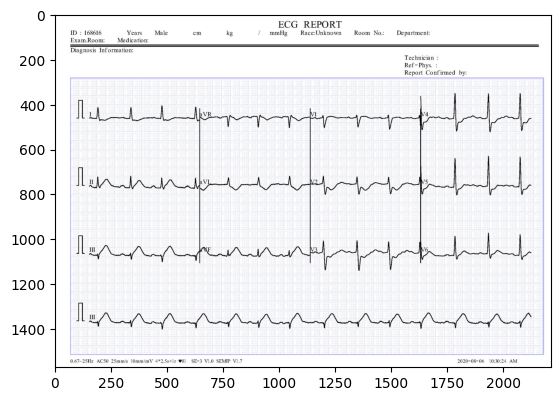

In [153]:
plt.imshow(image1) #show image on a plot, normal image

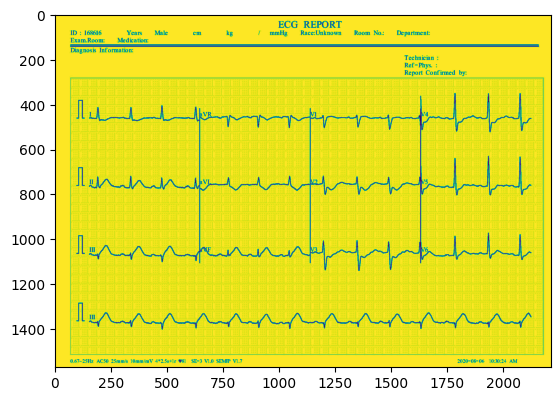

In [154]:
plt.imshow(img) #greyscale image

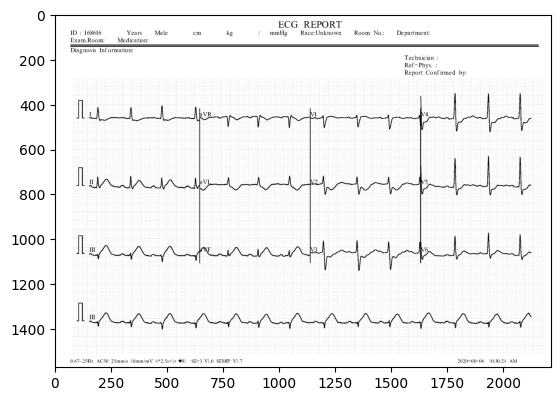

In [155]:
# applying Otsu thresholding 
# as an extra flag in binary  
# thresholding      
ret, thresh1 = cv2.threshold(img, 250, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) 
#show in cmap = gray     
plt.imshow(thresh1,cmap="gray")

In [156]:
import math
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image


threshold_values = {}
h = [1]
##target is to get rate and rhythm of heartbeats, the size and position of the heart chambers

def Hist(img):#draw histogram equalisation of image
   row, col = img.shape 
   y = np.zeros(256)
   for i in range(0,row):
      for j in range(0,col):
         y[img[i,j]] += 1
   x = np.arange(0,256)
   plt.bar(x, y, color='b', width=5, align='center', alpha=0.25)
   plt.show()
   return y


def get_optimal_threshold(): #find the max threshold for 12 lead images
    min_V2w = min(threshold_values.values())
    optimal_threshold = [k for k, v in threshold_values.items() if v == min_V2w]
    print ('optimal threshold', optimal_threshold[0])
    return optimal_threshold[0]


def regenerate_img(img, threshold):#regenerate image after getting optimum threshold
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= threshold:
                y[i,j] = 255
            else:
                y[i,j] = 0
    return y


def countPixel(h):#intensity of histogram
    cnt = 0
    for i in range(0, len(h)):
        if h[i]>0:
           cnt += h[i]
    return cnt


def weight(s, e):#weight of histogram
    w = 0
    for i in range(s, e):
        w += h[i]
    return w


def mean(s, e):
    m = 0
    w = weight(s, e)
    for i in range(s, e):
        m += h[i] * i

    return m/float(w)


def variance(s, e):
    v = 0
    m = mean(s, e)
    w = weight(s, e)
    for i in range(s, e):
        v += ((i - m) **2) * h[i]
    v /= w
    return v


def threshold(h):  ##trace files between classes of pixels
    cnt = countPixel(h)
    for i in range(1, len(h)):
        vb = variance(0, i)
        wb = weight(0, i) / float(cnt)
        mb = mean(0, i)

        vf = variance(i, len(h))
        wf = weight(i, len(h)) / float(cnt)
        mf = mean(i, len(h))

        V2w = wb * (vb)*(vb) + wf * (vf)*(vf)
        V2b = wb * wf * (mb - mf)**2

        fw = open("trace.txt", "a")
        fw.write('T='+ str(i) + "\n")

        fw.write('Wb='+ str(wb) + "\n")
        fw.write('Mb='+ str(mb) + "\n")
        fw.write('Vb='+ str(vb) + "\n")

        fw.write('Wf='+ str(wf) + "\n")
        fw.write('Mf='+ str(mf) + "\n")
        fw.write('Vf='+ str(vf) + "\n")

        fw.write('within class variance='+ str(V2w) + "\n")
        fw.write('between class variance=' + str(V2b) + "\n")
        fw.write("\n")

        if not math.isnan(V2w):
            threshold_values[i] = V2w

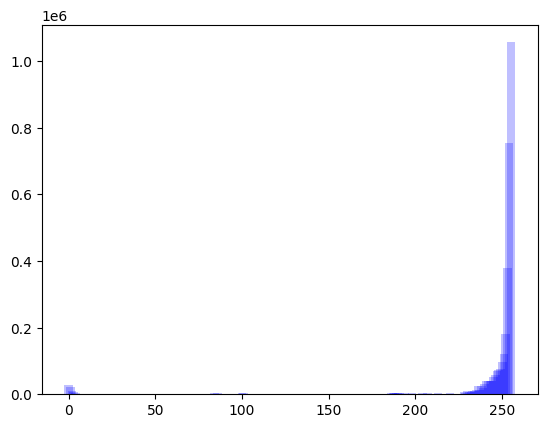

In [157]:
image = Image.open('MI(1).jpg').convert("L")
img = np.asarray(image)

h = Hist(img)

In [158]:
threshold(h)
print("traces calculated:", threshold(h))
#print("histogram y axis calculated:", h)

traces calculated: None


In [159]:
op_thres = get_optimal_threshold()
print(op_thres)

optimal threshold 95
95


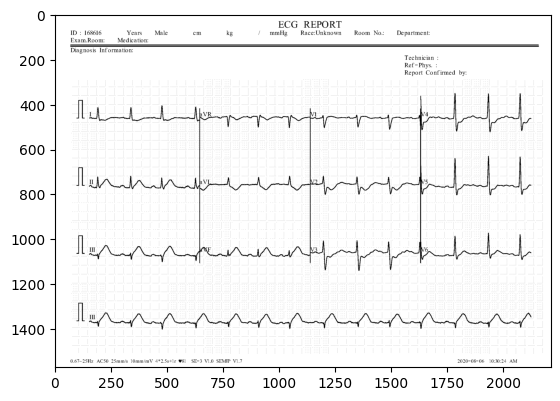

In [160]:
res = regenerate_img(img, op_thres)
plt.imshow(res,cmap="gray")
plt.savefig("otsu.jpg") 

In [161]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#img = cv.imread('e.png')
img=res
img.shape
img = np.full(img.shape, 6, np.uint8)
#plt.imshow(img,cmap="gray")

In [162]:
converted_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
dst = cv.fastNlMeansDenoisingColored(converted_img,None,10,15,7,21)

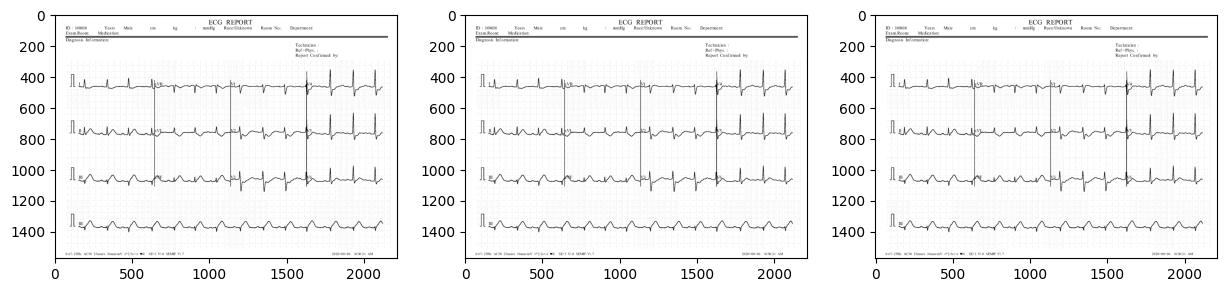

In [163]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#cap = cv.VideoCapture('vtest.avi')
# create a list of first 5 frames
#img = [cap.read()[1] for i in xrange(5)]
# convert all to grayscale
i=res
#gray = cv.cvtColor(i, cv.COLOR_BGR2GRAY)
# convert all to float64
gray = np.float64(i)
# create a noise of variance 25
noise = np.random.randn(*gray[1].shape)*10
# Add this noise to images
noisy = i+noise 
# Convert back to uint8
noisy = np.uint8(np.clip(i,0,255))
# Denoise 3rd frame considering all the 5 frames
#dst = cv.fastNlMeansDenoisingMulti(noisy, 2, 5, 1, 4, 7, 5)
dst=cv.fastNlMeansDenoising(noisy,dst,3,7,21)
plt.figure(figsize=(15, 10))
plt.subplot(131),plt.imshow(gray,'gray')
plt.subplot(132),plt.imshow(noisy,'gray')
plt.subplot(133),plt.imshow(dst,'gray')

plt.show()

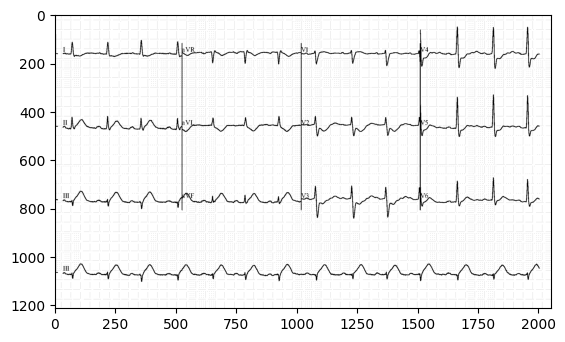

In [164]:
import cv2
#image = cv2.imread("test.jpg")
##crop images exactly
image=dst
crop_img_1 = image[300:(img.shape[1])-700, 120:600+(img.shape[0])]
plt.imshow(crop_img_1,cmap="gray")

In [165]:
img=crop_img_1
#plt.imshow(img,cmap="gray")

In [166]:
cv2.imwrite('cleaned.jpg',img) #save the cleaned image

True

In [167]:
import cv2
import matplotlib.pyplot as plt

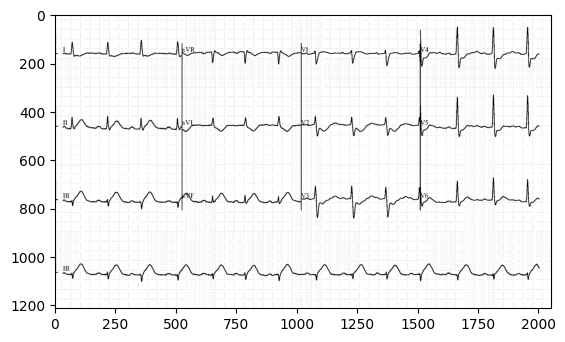

In [168]:
i = cv2.imread("cleaned.jpg",0)
plt.imshow(i,cmap="gray")

In [169]:
#print(i)

In [170]:
i.shape

(1213, 2052)

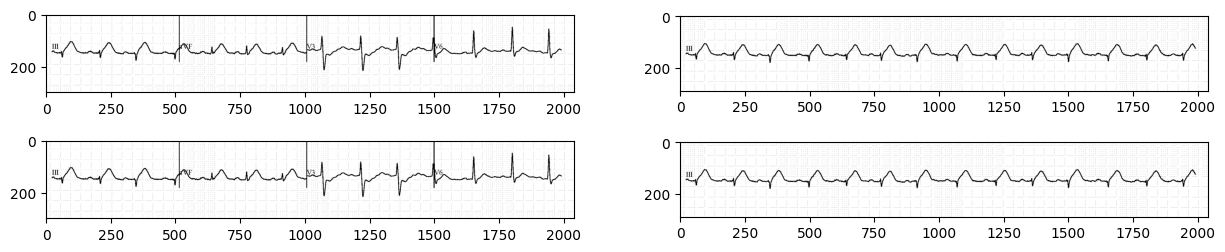

In [171]:
#crop each sector of each image: 4 sectors
crop_img_sect1 = i[0:300, 10:3500]
crop_img_sect2 = i[300:625, 10:3500]
crop_img_sect3 = i[625:925, 10:3500]
crop_img_sect4 = i[925:1225, 10:3500]

plt.figure(figsize=(15, 3))
plt.subplot(221),plt.imshow(crop_img_sect3,'gray')
plt.subplot(222),plt.imshow(crop_img_sect4,'gray')
plt.subplot(223),plt.imshow(crop_img_sect3,'gray')
plt.subplot(224),plt.imshow(crop_img_sect4,'gray')

plt.show()

In [172]:
cv2.imwrite('image_sectors/crop_sect1_MI.jpg',crop_img_sect1)
cv2.imwrite('image_sectors/crop_sect2_MI.jpg',crop_img_sect2)
cv2.imwrite('image_sectors/crop_sect3_MI.jpg',crop_img_sect3)
cv2.imwrite('image_sectors/crop_sect4_MI.jpg',crop_img_sect4)

True

In [173]:
crop_img_sect1[0]

array([255, 255, 255, ..., 255, 254,   1], dtype=uint8)

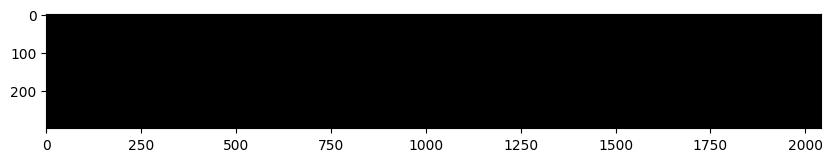

In [147]:
img=crop_img_sect1  ##test on sector 1
for i in range (0,crop_img_sect1.shape[0]):
  for j in range (0,crop_img_sect1.shape[1]):
    if img[i][j]==0:
      #check if black
      count=0
    else:##if not completely black turn to white
      count+=1
      img[i][j] = 250

plt.figure(figsize=(10,15))
plt.imshow(img,cmap="gray")

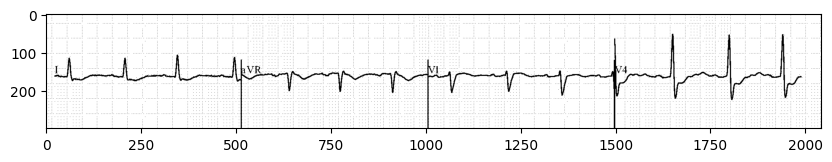

In [123]:
plt.figure(figsize=(10,15))
plt.imshow(crop_img_sect1,cmap="gray")  ##test on first sector

In [124]:
#function to stack the points in an image for the graph
#return coords of stack graph
def imagestack(img):
    img = img[:400,15:2070]
    threshold_level = op_thres
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    coords = np.column_stack(np.where(img < threshold_level-10))
    unwanted = np.column_stack(np.where(img >= threshold_level))
    #coords = coords.tolist()
    #print(coords)
    #X[:,0], X[:,1]
    #mask = img < threshold_level
    #img[mask] = (255, 0, 0)

    plt.figure(figsize=(15,15))
    plots = plt.imshow(img,cmap="gray")

    #plots = plt.plot(coords, color='r')

    plots2 = plt.scatter(coords[:,1], coords[:,0], color='r', alpha=0.1, marker='.', s=1)
    plt.axhline(y = 160, color = 'c', linestyle = 'dashed')
    #plots2 = plt.scatter(unwanted[:,1], unwanted[:,0], color='b', alpha=0.1, marker='.', s=1)
    print(type(plots2))

    return coords


#draw the coords
#return graph so you can sample points from it
def ecg2graph(coords, sector):
    plt.figure(figsize=(15,2))
    if(sector == 1):
        graph = plt.scatter(coords[:,1], coords[:,0], color= 'blue' , alpha=0.1, marker='.', s=1)
    if(sector == 2):
        graph = plt.scatter(coords[:,1], coords[:,0], color= 'orange' , alpha=0.1, marker='.', s=1)
    if(sector == 3):
        graph = plt.scatter(coords[:,1], coords[:,0], color= 'green' , alpha=0.1, marker='.', s=1)
    if(sector == 4):
        graph = plt.scatter(coords[:,1], coords[:,0], color= 'purple' , alpha=0.1, marker='.', s=1)
    else:
        graph = plt.scatter(coords[:,1], coords[:,0], color= 'black' , alpha=0.1, marker='.', s=1)
            
    plt.axhline(y = 160, color = 'c', linestyle = 'dashed')
    plt.xlim(min(coords[:,1]), max(coords[:,1]))
    plt.ylim(max(coords[:,0]), min(coords[:,0]))
    plt.grid(False)
    plt.show()

    return graph 
    

<class 'matplotlib.collections.PathCollection'>
<class 'matplotlib.collections.PathCollection'>
<class 'matplotlib.collections.PathCollection'>
<class 'matplotlib.collections.PathCollection'>


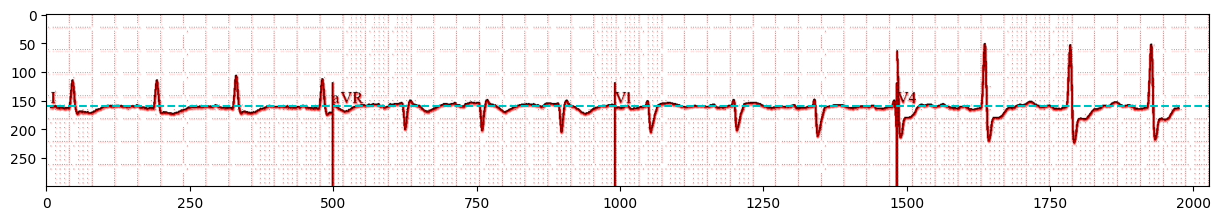

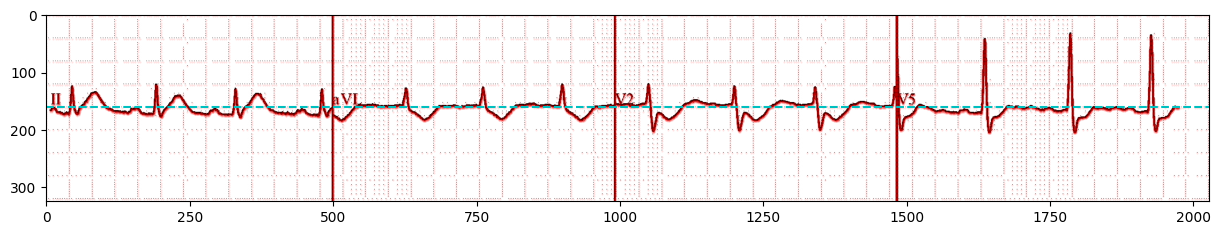

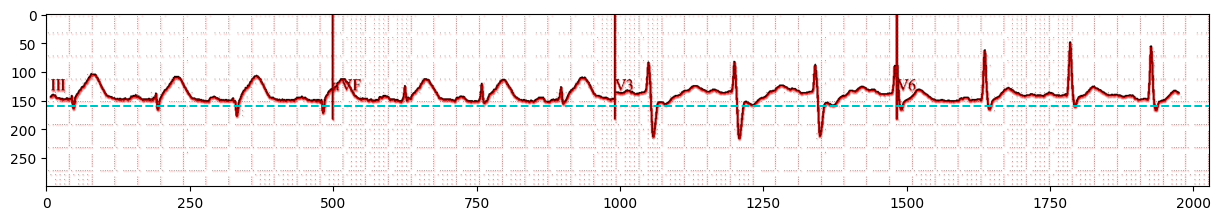

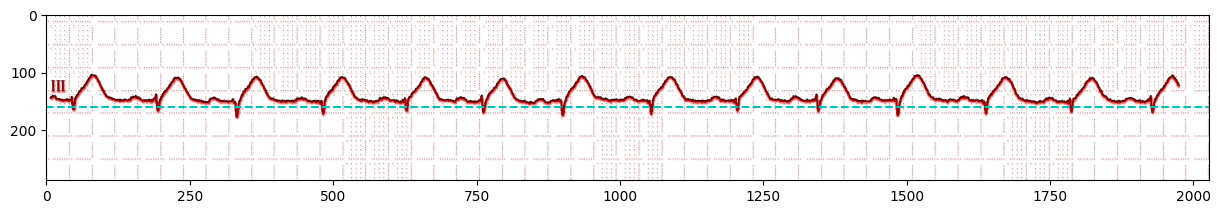

In [125]:
coords = imagestack(crop_img_sect1)
coords2 = imagestack(crop_img_sect2)
coords3 = imagestack(crop_img_sect3)
coords4 = imagestack(crop_img_sect4)

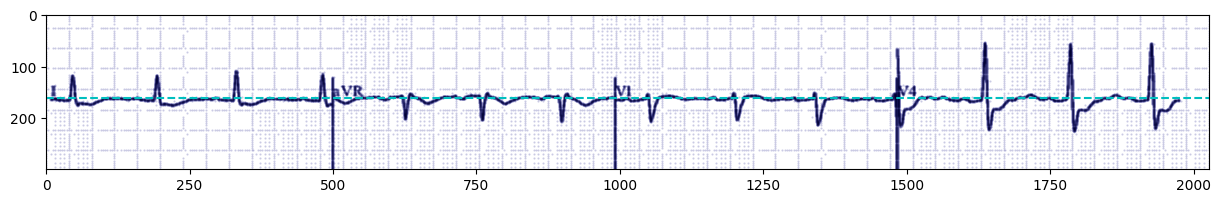

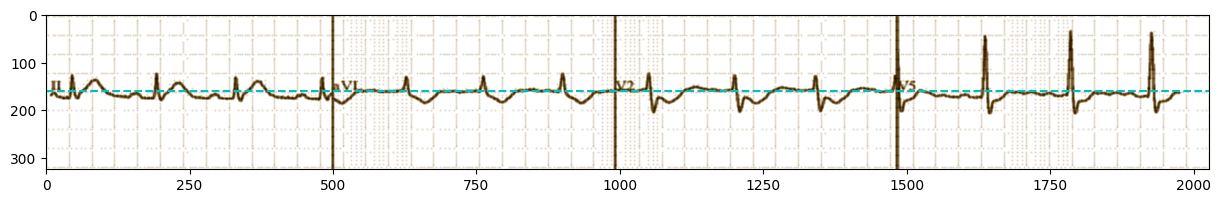

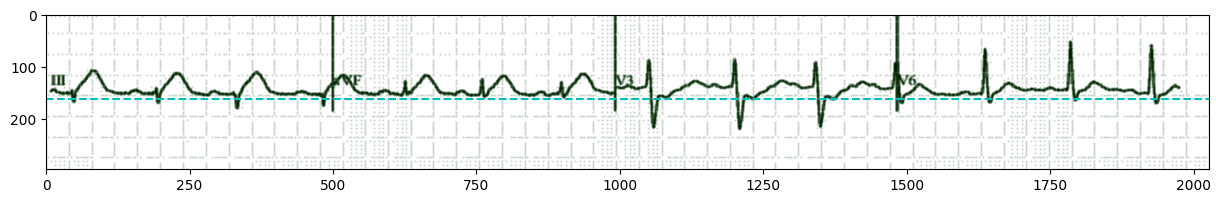

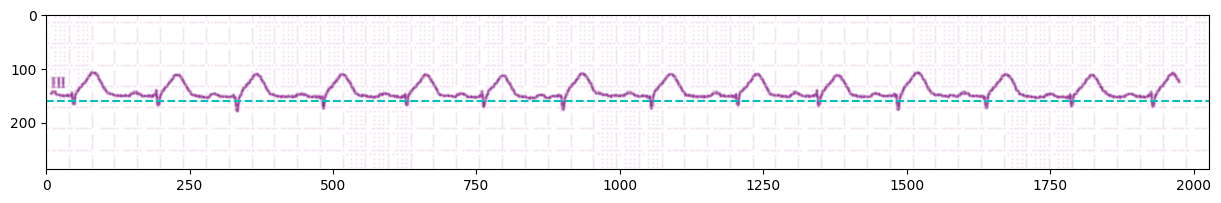

In [126]:
import numpy as np
import matplotlib.pyplot as plt
graph = ecg2graph(coords, 1)
graph2 = ecg2graph(coords2, 2)
graph3 = ecg2graph(coords3, 3)
graph4 = ecg2graph(coords4, 4)

In [127]:
#sample points
import neurokit2 as nk
import signal
from biosppy import storage
from biosppy.signals import ecg 

In [128]:
coords.shape

(24597, 2)

In [129]:
coords_new = coords.flatten()
coords_new

array([   0,    0,    0, ..., 1483,  299, 1484], dtype=int64)

In [130]:
_, rpeaks = nk.ecg_peaks(coords_new, sampling_rate=1000)
_, waves_peak = nk.ecg_delineate(coords_new, rpeaks, sampling_rate=1000, method="peak")

In [131]:
signal_dwt, waves_dwt = nk.ecg_delineate(coords_new, 
                                        rpeaks, 
                                        sampling_rate=1000, 
                                        method="dwt", 
                                        show=True, 
                                        show_type='peaks')

KeyboardInterrupt: 

## draft______________________________________________

[[   0  498]
 [   0  499]
 [   0  500]
 ...
 [ 324 1482]
 [ 324 1483]
 [ 324 1484]]


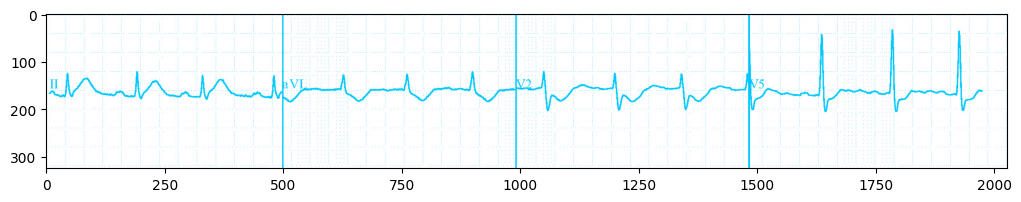

In [ ]:
import cv2
import numpy as np

image = cv2.imread('cropped_ii.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Set threshold level
threshold_level = op_thres

# Find coordinates of all pixels below threshold
coords = np.column_stack(np.where(gray < threshold_level))

print(coords)

# Create mask of all pixels lower than threshold level
mask = gray < threshold_level

# Color the pixels in the mask
image[mask] = (0, 200, 255)

plots2 = plt.figure(figsize=(15,2))
plots2 = plt.imshow(image,cmap="gray")
#plt.scatter(coords[:,1], coords[:,0], color='r', alpha=0.2)

#cv2.imshow('image', image)
#cv2.waitKey()

In [ ]:
#type(coords.tolist())
#coords = coords.tolist()
print(coords[25770][0])
len(coords)

324


25771

[[   0  513]
 [   0  514]
 [   0  515]
 ...
 [ 324 1497]
 [ 324 1498]
 [ 324 1499]]
<class 'matplotlib.collections.PathCollection'>


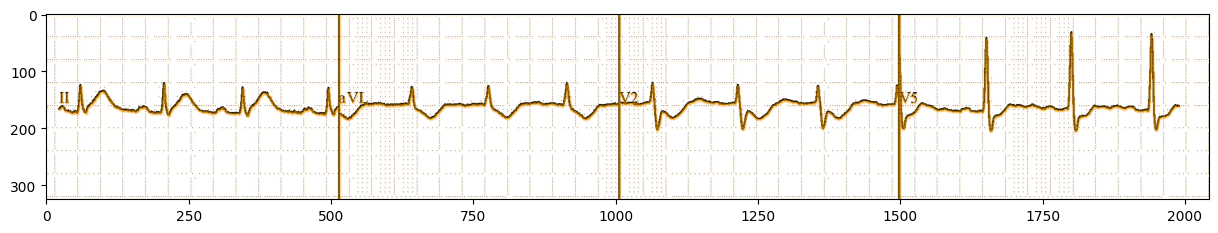

In [ ]:
img2 = crop_img_sect2
threshold_level = op_thres
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
coords2 = np.column_stack(np.where(img2 < threshold_level))
#coords = coords.tolist()
print(coords2)
#X[:,0], X[:,1]
#mask = img < threshold_level
#img[mask] = (255, 0, 0)

plt.figure(figsize=(15,15))
plots22 = plt.imshow(img2,cmap="gray")

#plots = plt.plot(coords, color='r')

plots22 = plt.scatter(coords2[:,1], coords2[:,0], color='orange', alpha=0.1, marker='.', s=1)
print(type(plots22))

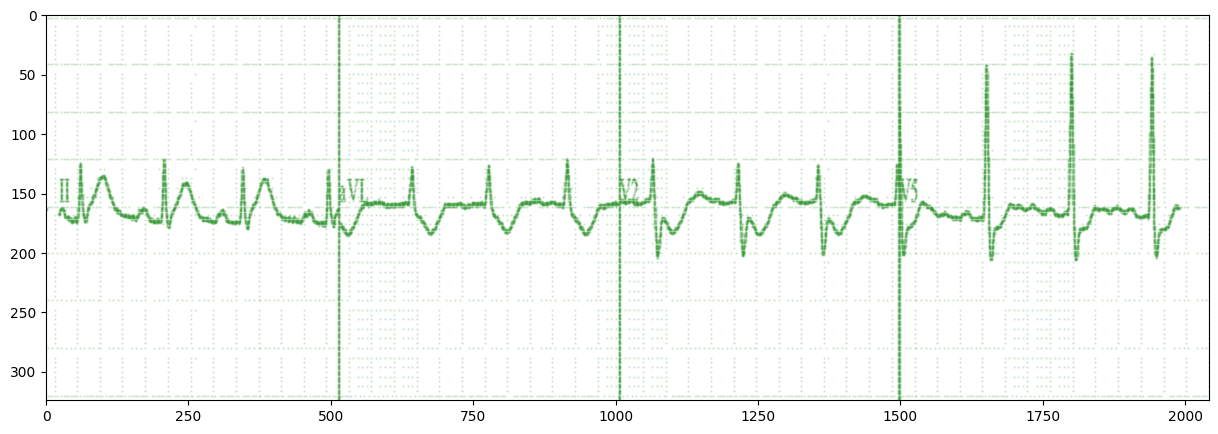

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(coords2[:,1], coords2[:,0], color='green', alpha=0.2, marker='.', s=1)
plt.xlim(min(coords2[:,1]), max(coords2[:,1]))
plt.ylim(max(coords2[:,0]), min(coords2[:,0]))
plt.show()

In [ ]:
img[0]

array([255, 255, 255, ..., 255, 255,   0], dtype=uint8)

In [ ]:
pltx = []
plty = []
for i in range(325):
    for j in range(2027):
        if img[i][j]==255:
            pltx.append(i)
            plty.append(j)
            
#plt.scatter(i,j,color='r')

In [ ]:
#pltx

In [ ]:
cv2.imwrite('cropped_ii.jpg',img)

True

In [ ]:
from PIL import Image

In [ ]:
plotted = Image.open('cropped_ii.jpg', 'r')

In [ ]:
img.shape

(1213, 2052)

In [ ]:
pix_val = list(plotted.getdata())

In [ ]:
pltx = []
plty = []
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        if(img[x][y] == 255):
            pltx.append(x)
            plty.append(y)  ##find all completely black pixels
            break


In [ ]:
img.shape

(1213, 2052)

In [ ]:
#pix_val_flat = [x for sets in pix_val for x in sets]
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

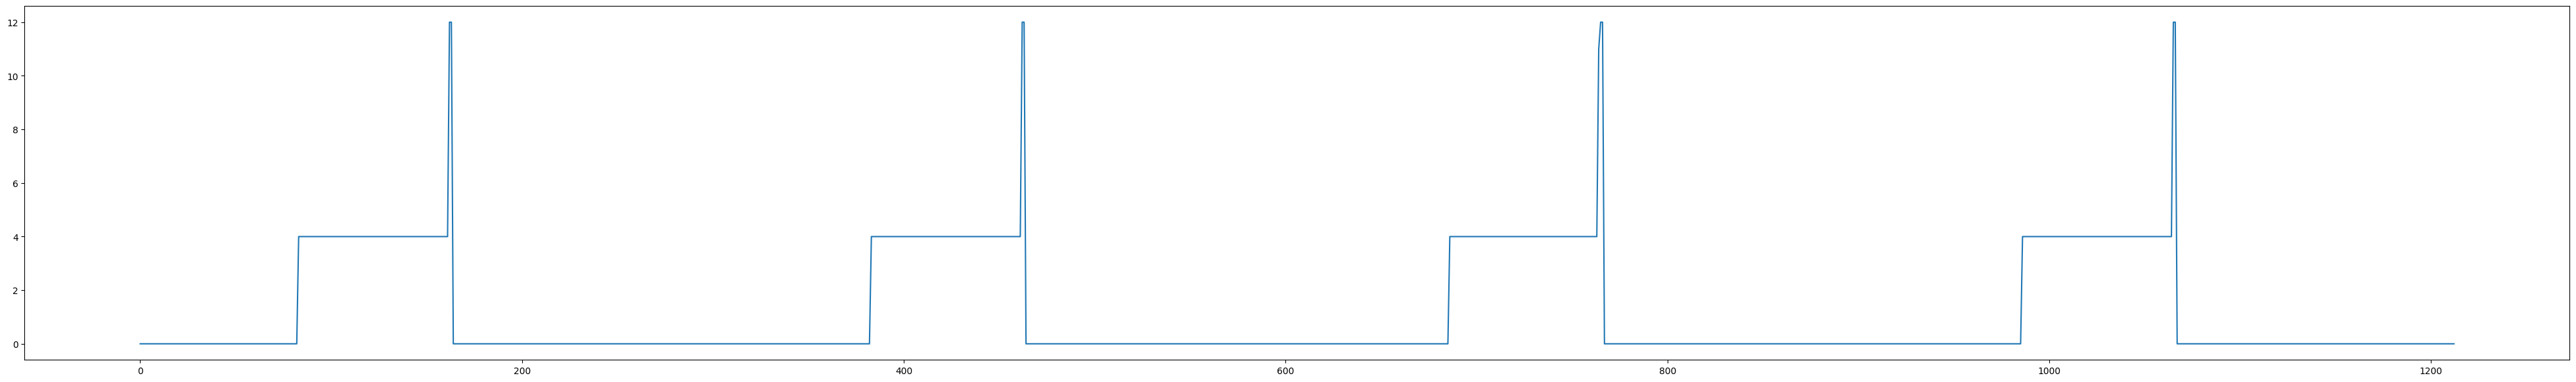

In [ ]:
plt.figure(figsize=(50,7))
plt.plot(pltx, plty)
plt.show

In [ ]:
pixel_from_top=[]
for i in range (0,325):
  id=0
  
  for j in range (0,2027):
      if img[j][i]==255:
        pixel_from_top.append(j)
        id=1
        # print("f\n")
        break
        
  
  if id==0:
    # print("nf\n")
    pixel_from_top.append(pixel_from_top[i-1])

In [ ]:
len(pixel_from_top)

325

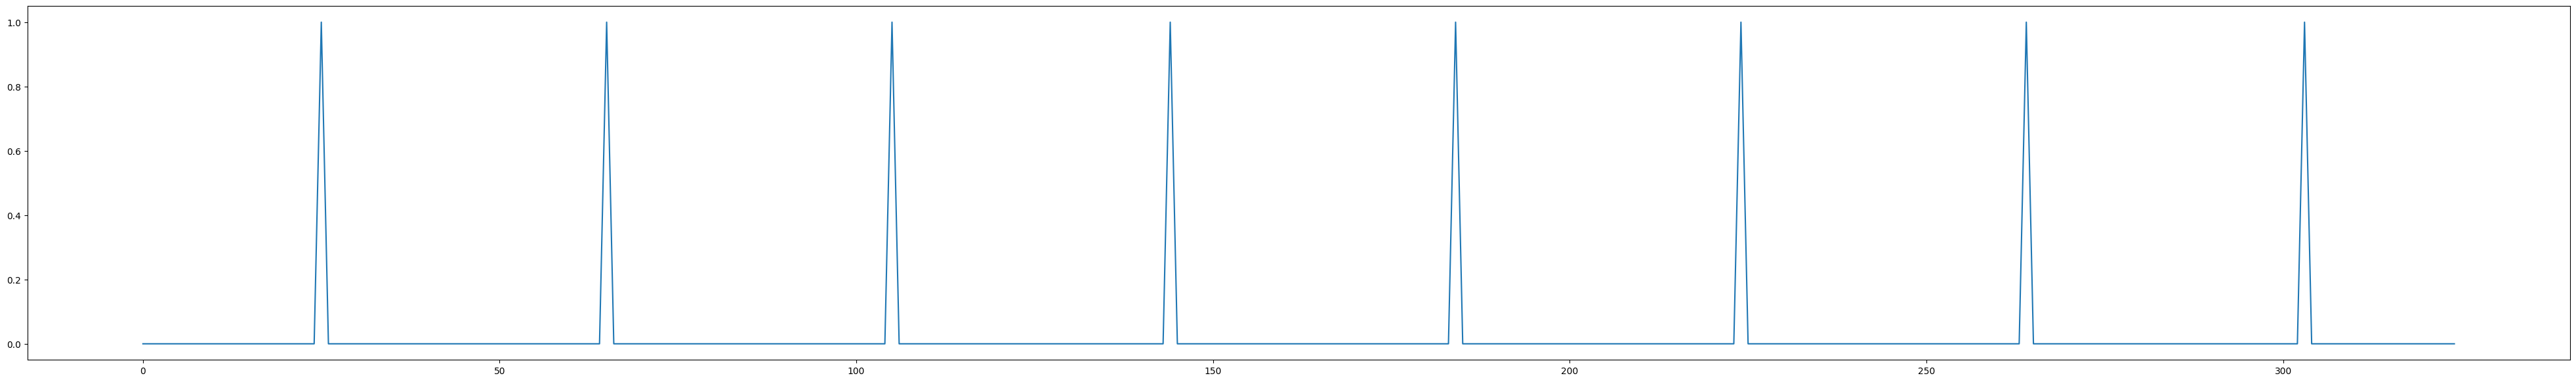

In [ ]:
plt.figure(figsize=(50,7))
plt.plot(pixel_from_top)


In [ ]:
pixel_from_bottom=[]
for i in range (325):
  pixel_from_bottom.append(120-pixel_from_top[i])

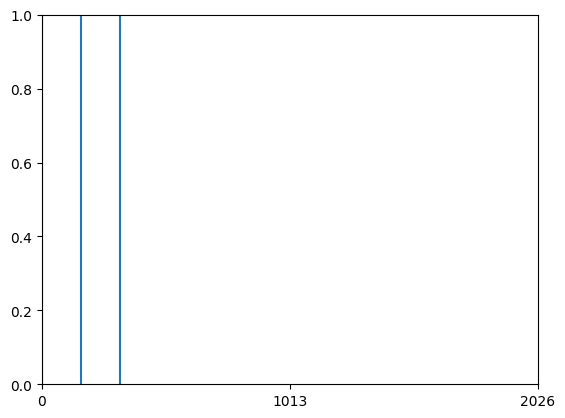

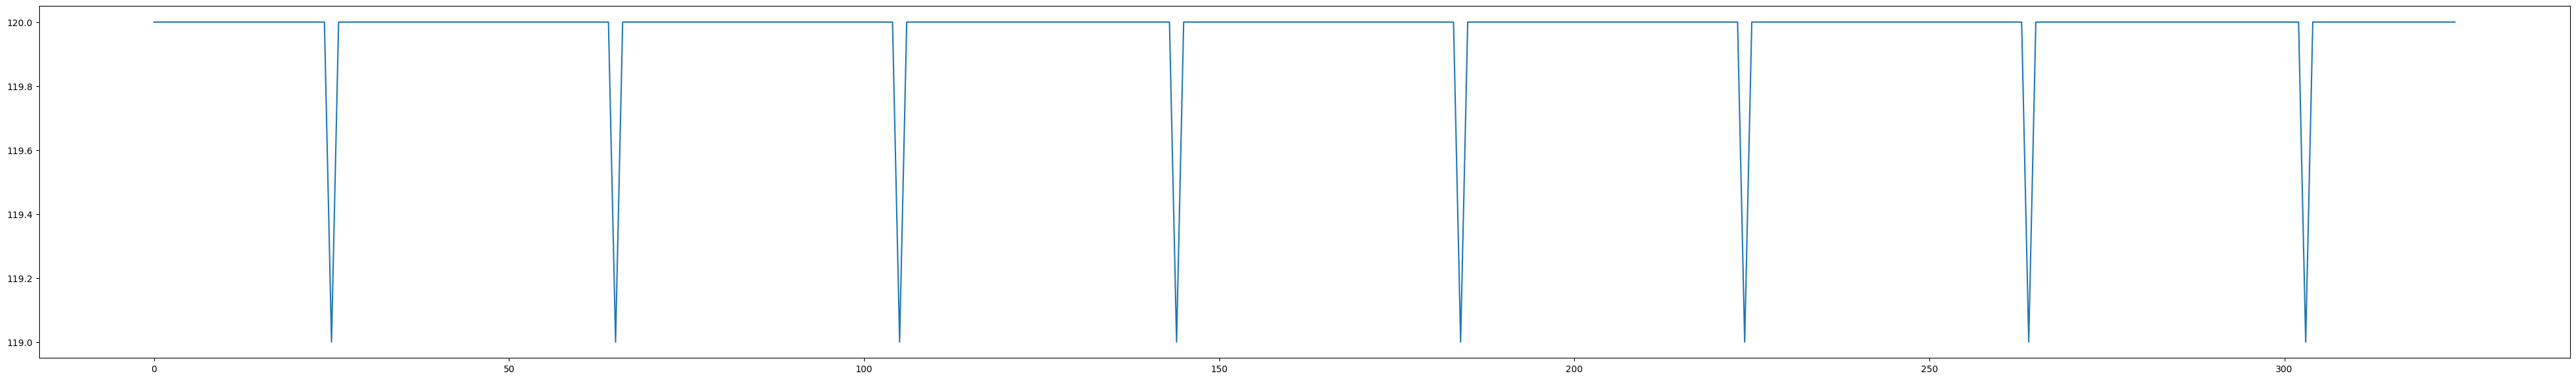

In [ ]:
plt.xticks(range(0,2027,1013))
for i in range (0,325,160):
  plt.axvline(x=i)
plt.figure(figsize=(50,7))
plt.plot(pixel_from_bottom)

In [ ]:
len(pixel_from_bottom)

325